<a href="https://colab.research.google.com/github/HS-711/hs/blob/main/AAI%202012%20Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,588 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and di

In [ ]:
!pip install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00

In [ ]:
from pycaret.classification import *
import pandas as pd
import numpy as np

In [ ]:
#데이터 불러오기
#col: [['현재가','전일비','액면가','시가총액','상장주식수','외국인비율','거래량','PER','ROE','label']]
train_data = pd.read_csv('./train.csv')
train_data = train_data.iloc[:,1:]

ones = []
for row in range(len(train_data)):
    if train_data.iloc[row,1] == 0.000:
        ones.append(row)
train_data = train_data.drop(ones)
print(train_data)

            현재가       전일비    액면가       시가총액       상장주식수  외국인비율          거래량  \
0      2351.703   116.656  500.0    832.124   35392.000  1.658  2706392.610   
1     11687.402    51.515    0.0    304.111    2600.000  0.490    50847.441   
3      9408.961   254.445    0.0    292.195    3105.573  1.905   132966.463   
4      2226.067   114.968  100.0    605.343   27191.000  2.551   522215.695   
5      9537.117  1554.522  500.0   2787.400   29229.000  3.157  3966153.435   
...         ...       ...    ...        ...         ...    ...          ...   
2445   5945.507    56.691  100.0  29956.805  503860.000  2.707  1247774.954   
2446  11745.777   595.931  500.0   1428.874   12166.000  1.322   101153.291   
2447  23499.146   399.146  500.0   1605.869    6835.000  0.856    37020.464   
2448   3578.759   100.126  500.0   1527.727   42685.000  8.141   336514.276   
2449  10832.144    12.732    0.0     49.000     450.000  2.151      326.929   

         PER    ROE  label  
0     19.116   6.50   

"\nlabel0_data = train_data[train_data['label'] == 0]\nlabel2_data = train_data[train_data['label'] == 2]\n\n# 비율을 맞추기 위해 삭제할 라벨 0의 데이터 개수 계산\ndelete_count = len(label0_data) - len(label2_data)\n\n# 라벨 0의 데이터 중 삭제할 개수만큼 무작위로 선택하여 삭제\nif delete_count > 0:\n    label0_data = label0_data.sample(frac=1, random_state=42)  # 데이터를 무작위로 섞음\n    label0_data = label0_data.iloc[:-delete_count]  # 삭제할 개수만큼 제외\n    train_data = pd.concat([label0_data, label2_data])  # 삭제한 데이터를 제외한 나머지 데이터와 라벨 2의 데이터를 결합\n\n# 결과 확인\nprint(train_data['label'].value_counts())\n"

In [ ]:
#분리 - 결측치 제거
#액면가가 0인 데이터와 그렇지 않은 데이터를 분리.
train_no_face = train_data[train_data['액면가'] == 0]
train_face = train_data[train_data['액면가'] != 0]

train_no_face = train_no_face[['현재가','전일비','시가총액','상장주식수','외국인비율','거래량','label']]
print(train_no_face)
train_face = train_face[['현재가','전일비','액면가','시가총액','상장주식수','외국인비율','거래량','PER','ROE','label']]
train_face = train_face.dropna()
print(train_face)

            현재가      전일비      시가총액      상장주식수   외국인비율         거래량  label
1     11687.402   51.515   304.111   2600.000   0.490   50847.441      0
3      9408.961  254.445   292.195   3105.573   1.905  132966.463      0
6      5800.227   29.685    35.000    600.000   0.000    4191.530      2
8      7400.236  202.070    74.223   1000.000   0.000   42050.391      0
9     52358.467  204.366    66.000    126.000   0.000     135.948      0
...         ...      ...       ...        ...     ...         ...    ...
2431   2049.097   66.357   592.119  28911.145   0.010  589123.238      2
2433   5638.084   37.520  1453.000  25766.718   0.746  129519.113      0
2442  13542.202   53.409  1839.172  13580.000  15.181   34154.196      2
2444   9659.848  262.412   101.334   1050.000   0.000    3973.275      0
2449  10832.144   12.732    49.000    450.000   2.151     326.929      2

[690 rows x 7 columns]
            현재가       전일비     액면가       시가총액     상장주식수  외국인비율          거래량  \
0      2351.703   116.

In [ ]:
#노이즈제거
from sklearn.ensemble import IsolationForest

# 이상치 탐지 모델 초기화
outlier_detector = IsolationForest(contamination=0.1)  # 이상치 비율 설정
print("Original DataFrame shape:", train_face.shape)
# 피처와 레이블 분리
y = train_face['label']
X = train_face.drop('label', axis=1)

# 이상치 탐지 모델 학습
outlier_detector.fit(X)

# 이상치 여부 예측
outlier_predictions = outlier_detector.predict(X)

# 이상치 제거 후 새로운 데이터프레임 생성
train_face = train_face[outlier_predictions == 1]

# 결과 확인
print("Cleaned DataFrame shape:", train_face.shape)


Original DataFrame shape: (1483, 10)
Cleaned DataFrame shape: (1334, 10)


In [ ]:
#피치 엔지니어링
# 시가총액 대비 주식의 거래량 비율 (Volume Ratio to Market Cap)
train_no_face['volume_ratio_to_market_cap'] = train_no_face['거래량'] / train_no_face['시가총액']
train_face['volume_ratio_to_market_cap'] = train_face['거래량'] / train_face['시가총액']

# 주당 시가총액 (Market Cap per Share)
train_no_face['market_cap_per_share'] = train_no_face['시가총액'] / train_no_face['상장주식수']
train_face['market_cap_per_share'] = train_face['시가총액'] / train_face['상장주식수']

# PER 대비 ROE 비율 (ROE Ratio to PER)
train_face['roe_ratio_to_per'] = train_face['ROE'] / train_face['PER']

# 외국인비율 대비 거래량 비율 (Volume Ratio to Foreign Ownership Ratio)
train_no_face['volume_ratio_to_foreign_ownership_ratio'] = train_no_face['거래량'] / train_no_face['외국인비율']
train_face['volume_ratio_to_foreign_ownership_ratio'] = train_face['거래량'] / train_face['외국인비율']
#train_no_face['volume_ratio_to_foreign_ownership_ratio'] = (train_no_face['volume_ratio_to_foreign_ownership_ratio'] - train_no_face['volume_ratio_to_foreign_ownership_ratio'].mean()) / train_no_face['volume_ratio_to_foreign_ownership_ratio'].std()
#train_face['volume_ratio_to_foreign_ownership_ratio'] = (train_face['volume_ratio_to_foreign_ownership_ratio'] - train_face['volume_ratio_to_foreign_ownership_ratio'].mean()) / train_face['volume_ratio_to_foreign_ownership_ratio'].std()

# 주식의 상장주식수 대비 외국인 보유 주식 비율 (Foreign Ownership Ratio to Outstanding Shares)
train_no_face['foreign_ownership_ratio_to_outstanding_shares'] = train_no_face['외국인비율'] / train_no_face['상장주식수']
train_face['foreign_ownership_ratio_to_outstanding_shares'] = train_face['외국인비율'] / train_face['상장주식수']

# 상장주식수 대비 주식의 거래량 비율 (Volume Ratio to Outstanding Shares)
train_no_face['volume_ratio_to_outstanding_shares'] = train_no_face['거래량'] / train_no_face['상장주식수']
train_face['volume_ratio_to_outstanding_shares'] = train_face['거래량'] / train_face['상장주식수']

# 주식의 상장주식수 대비 PER 비율 (PER Ratio to Outstanding Shares)
train_face['per_ratio_to_outstanding_shares'] = train_face['PER'] / train_face['상장주식수']

# 액면가 대비 현재가 비율 (Price Ratio to Par Value)
train_face['price_ratio_to_par_value'] = train_face['현재가'] / train_face['액면가']

# 외국인비율 대비 시가총액 비율 (Market Cap Ratio to Foreign Ownership Ratio)
train_no_face['market_cap_ratio_to_foreign_ownership_ratio'] = train_no_face['시가총액'] / train_no_face['외국인비율']
train_face['market_cap_ratio_to_foreign_ownership_ratio'] = train_face['시가총액'] / train_face['외국인비율']

# 주식의 거래량 대비 PER 비율 (PER Ratio to Volume)
train_face['per_ratio_to_volume'] = train_face['PER'] / train_face['거래량']

del(train_face['전일비'])
#del(train_no_face['전일비'])
train_no_face['전일비'] = -1 * train_no_face['전일비']
# 데이터프레임에서 열별로 무한대 값 또는 너무 큰 값을 포함하는 열 검출
problematic_columns = []
for col in train_no_face.columns:
    if np.any(np.isinf(train_no_face[col])) or np.any(np.abs(train_no_face[col]) > np.finfo('float64').max):
        problematic_columns.append(col)

# 결과 출력
print("Problematic Columns:")
print(problematic_columns)

for col in problematic_columns:
    del(train_no_face[col])

problematic_columns = []
for col in train_face.columns:
    if np.any(np.isinf(train_face[col])) or np.any(np.abs(train_face[col]) > np.finfo('float64').max):
        problematic_columns.append(col)

# 결과 출력
print("Problematic Columns:")
print(problematic_columns)

for col in problematic_columns:
    del(train_face[col])

Problematic Columns:
['volume_ratio_to_foreign_ownership_ratio', 'market_cap_ratio_to_foreign_ownership_ratio']
Problematic Columns:
['volume_ratio_to_foreign_ownership_ratio', 'market_cap_ratio_to_foreign_ownership_ratio']


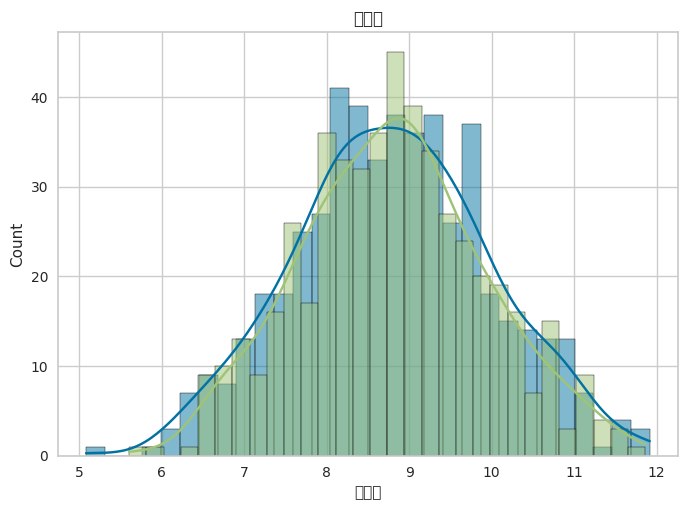

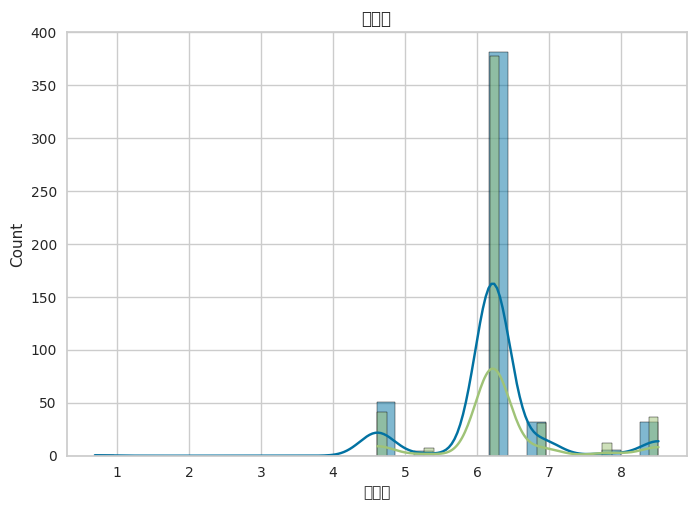

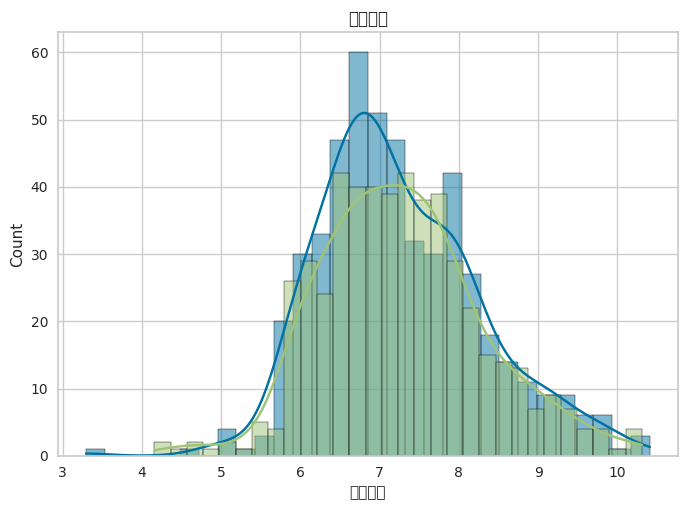

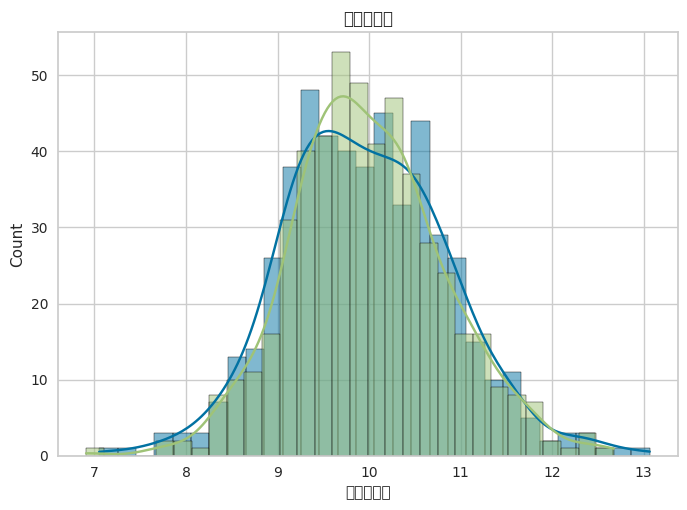

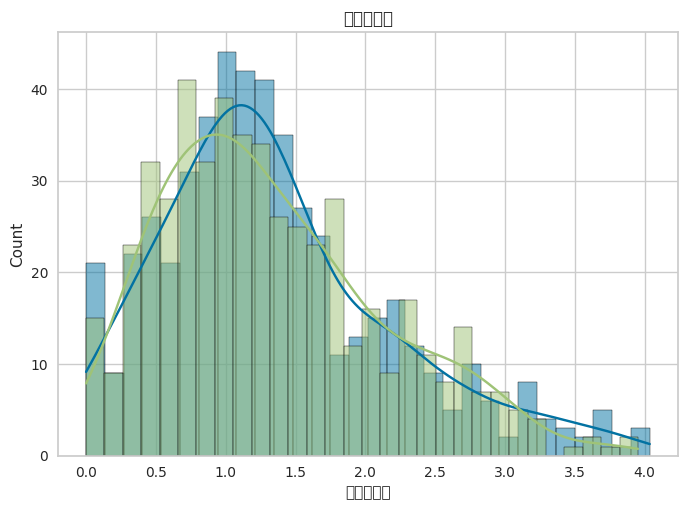

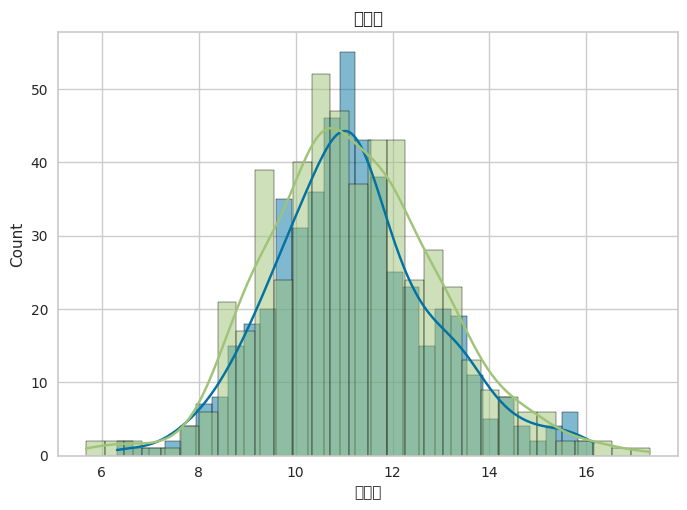

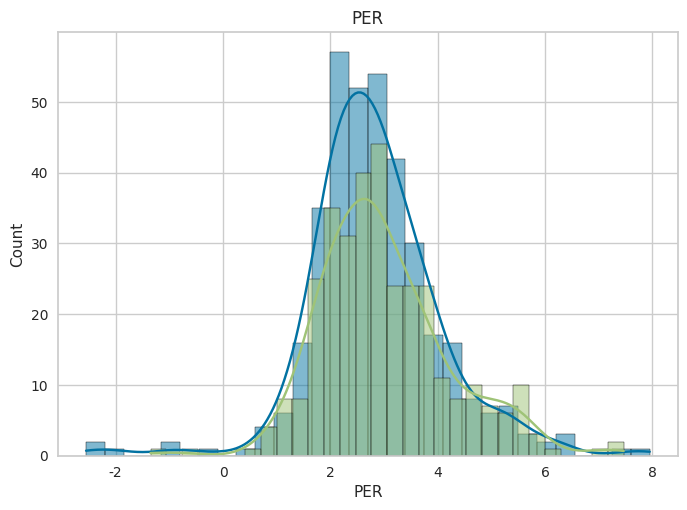

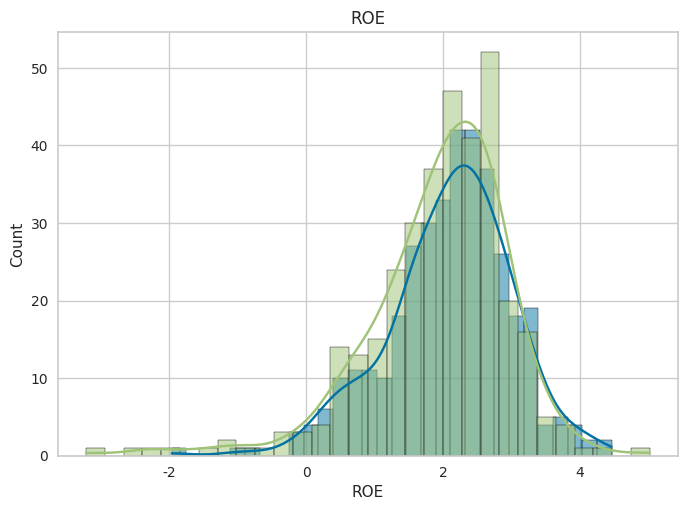

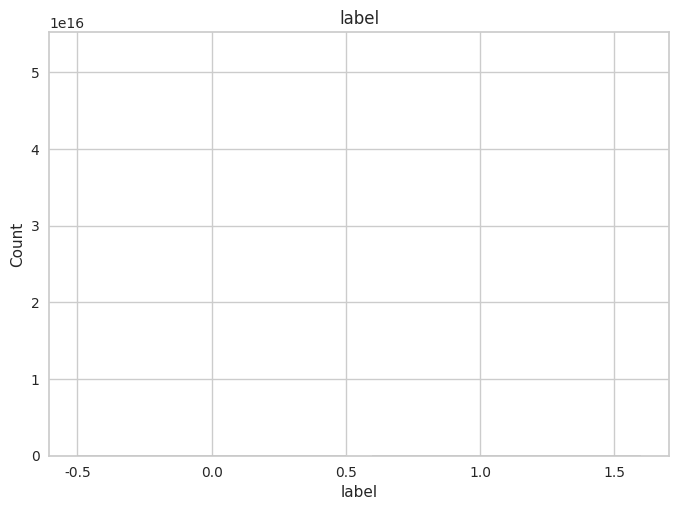

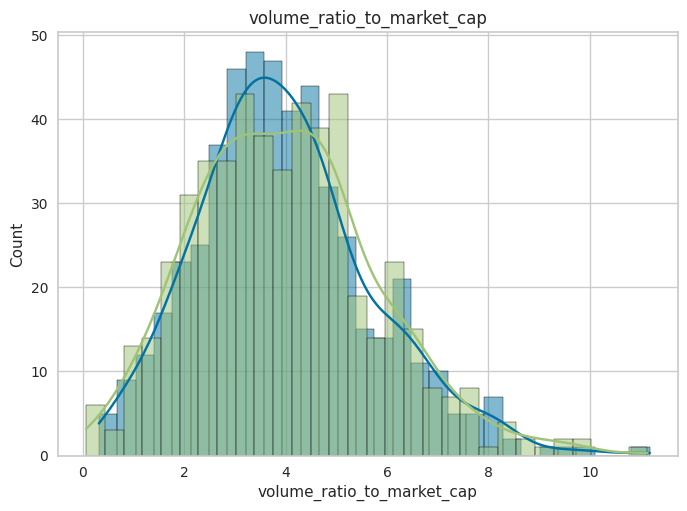

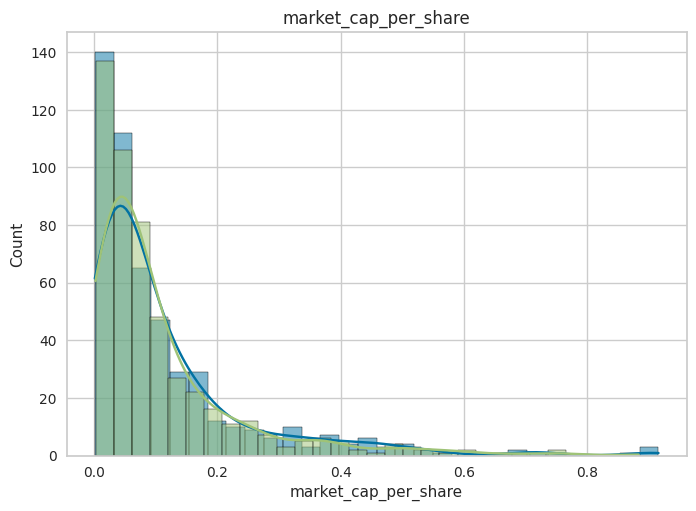

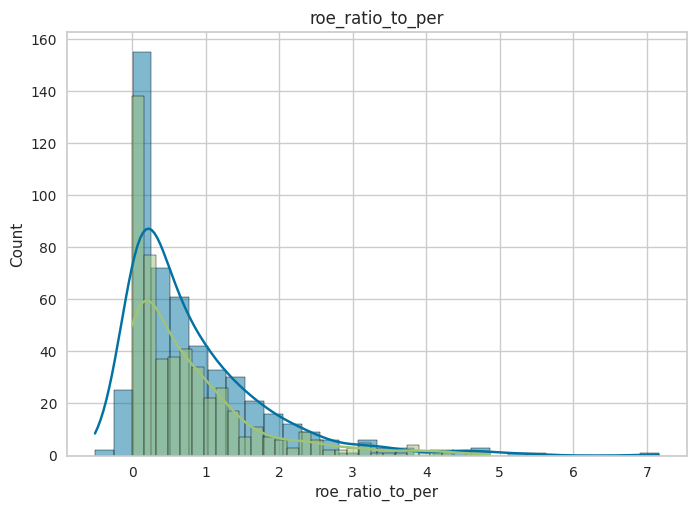

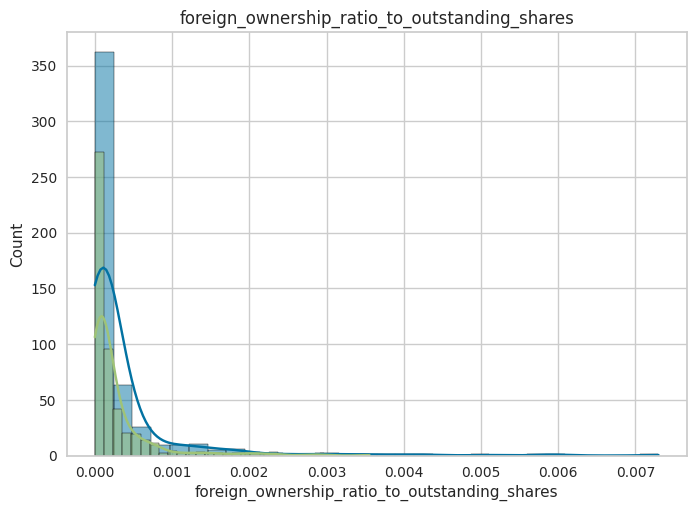

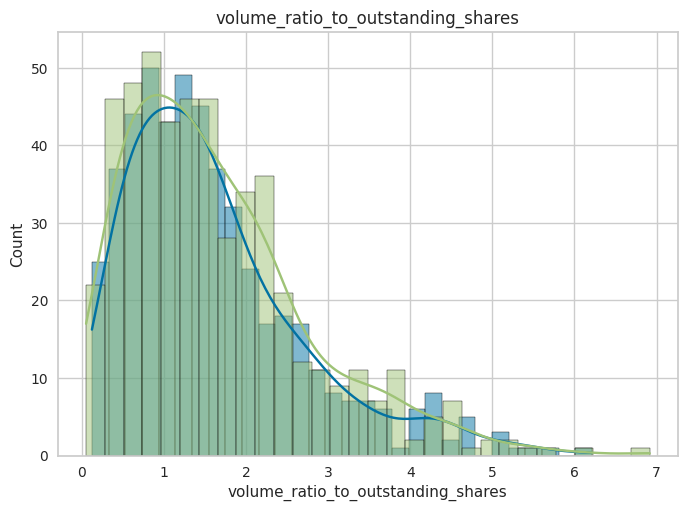

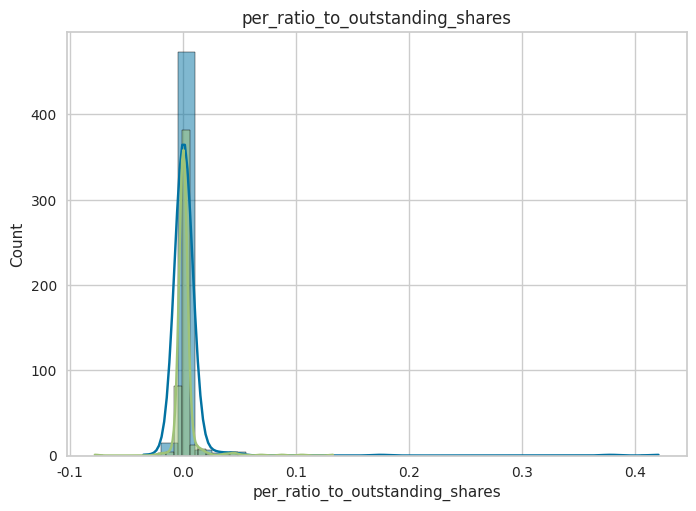

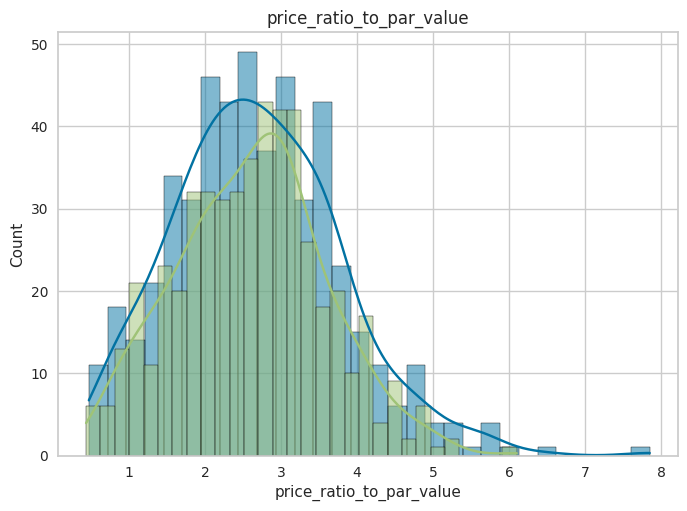

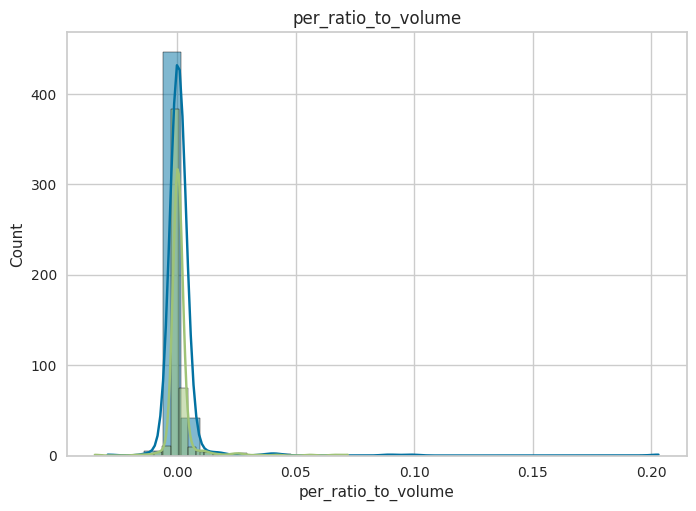

            현재가     액면가      시가총액      상장주식수  외국인비율          거래량     PER  \
0      2351.703   500.0   832.124  35392.000  1.658  2706392.610  19.116   
5      9537.117   500.0  2787.400  29229.000  3.157  3966153.435  12.102   
7      7289.331  1000.0  2703.046  37080.000  3.179   319456.276  11.161   
10    57547.857   500.0  7278.465  12648.000  2.815   137816.287 -34.814   
11    28862.718   500.0  3339.272  11569.000  9.650     5778.938   9.825   
...         ...     ...       ...        ...    ...          ...     ...   
2441   4051.895   500.0   404.188   9969.969  0.988    40363.699  71.088   
2443   1423.827   500.0   848.598  59584.000  1.999   238813.637 -47.463   
2446  11745.777   500.0  1428.874  12166.000  1.322   101153.291  -5.633   
2447  23499.146   500.0  1605.869   6835.000  0.856    37020.464 -20.190   
2448   3578.759   500.0  1527.727  42685.000  8.141   336514.276   8.949   

        ROE  volume_ratio_to_market_cap  market_cap_per_share  \
0      6.50           

In [ ]:
#시각화 - face
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

train_face_2 = train_face[train_face['label'] == 2]
train_face_0 = train_face[train_face['label'] == 0].sample(n=len(train_face_2), random_state=42)


for col in train_face.columns:
    train_face_0[col] = np.log1p(train_face_0[col])
    train_face_2[col] = np.log1p(train_face_2[col])

    #means = train_no_face_0[col].mean()
    #stds = train_no_face_0[col].std()
    #train_no_face_0[col] = (train_no_face_0[col] - means) / stds

    #means = train_no_face_2[col].mean()
    #stds = train_no_face_2[col].std()
    #train_no_face_2[col] = (train_no_face_2[col] - means) / stds

    sns.histplot(data = train_face_0[col],bins=30,kde=True)
    sns.histplot(data = train_face_2[col],bins=30,kde=True)
    plt.title(col)
    plt.show()

from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

# 피처와 레이블 분리
y = train_face['label']
X = train_face.drop('label', axis=1)

# SelectKBest를 사용하여 피처 중요도 계산
selector = SelectKBest(score_func=f_classif, k = 10)  # k는 남길 피처의 개수
print(X)
selector.fit(X, y)

# 중요도를 기준으로 피처 선택
selected_features = X.columns[selector.get_support()]
removed_features = X.columns[~selector.get_support()]

# 결과 출력
print('f_classif')
print("Selected Features:")
print(selected_features)

print("\nRemoved Features:")
print(removed_features)
removed_features = ['현재가', '액면가', '상장주식수', '외국인비율', '거래량', 'PER']

In [ ]:
for col in removed_features:
    X = X.drop(col,axis = 1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#train_face['전일비'] = -1 * train_face['전일비']
#print(train_face['전일비'])
train_data = train_face

exp = setup(data = train_data, target = 'label')

best_model = compare_models(n_select=10)

for model in best_model:
    print(model)
    print(model.get_params())

,Description,Value
0,Session id,6454
1,Target,label
2,Target type,Binary
3,Target mapping,"0: 0, 2: 1"
4,Original data shape,"(1334, 17)"
5,Transformed data shape,"(1334, 17)"
6,Transformed train set shape,"(933, 17)"
7,Transformed test set shape,"(401, 17)"
8,Numeric features,16
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6206,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0610
lr,Logistic Regression,0.6088,0.4998,0.0056,0.0667,0.0101,-0.0204,-0.0498,0.5400
ridge,Ridge Classifier,0.6066,0.0000,0.0029,0.0333,0.0053,-0.0257,-0.0549,0.0440
lda,Linear Discriminant Analysis,0.5991,0.5202,0.0142,0.1600,0.0257,-0.0345,-0.0623,0.0630
ada,Ada Boost Classifier,0.5840,0.5266,0.2314,0.4167,0.2957,0.0341,0.0380,0.2960
gbc,Gradient Boosting Classifier,0.5777,0.4935,0.1920,0.3789,0.2528,0.0053,0.0040,0.4060
svm,SVM - Linear Kernel,0.5703,0.0000,0.1833,0.1096,0.1323,-0.0093,-0.0086,0.0420
lightgbm,Light Gradient Boosting Machine,0.5701,0.5106,0.2734,0.4043,0.3254,0.0266,0.0283,0.2630
et,Extra Trees Classifier,0.5637,0.5096,0.1860,0.3465,0.2392,-0.0226,-0.0275,0.5340
rf,Random Forest Classifier,0.5626,0.5210,0.1888,0.3544,0.2453,-0.0224,-0.0250,0.5010


Processing:   0%|          | 0/74 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=6454, strategy='prior')
{'constant': None, 'random_state': 6454, 'strategy': 'prior'}
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6454, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 6454, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=6454, solver='auto',
                tol=0.0001)
{'alpha': 1.0, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, '

In [ ]:
### face
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

# 각 모델의 파라미터를 딕셔너리 형태로 저장한 리스트
how_many_model = 5
models = []
for mod in best_model[:how_many_model]:
    exec('model = mod')
    models.append((str(model).split('(')[0], model))

train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 156)
# 앙상블 모델 생성
ensemble_face = VotingClassifier(models)

# 앙상블 모델 학습 및 예측
ensemble_face.fit(train_x, train_y)
y_pred = ensemble_face.predict(test_x)
cnt = 0
for i in range(len(y_pred)):
    if y_pred[i] == test_y.iloc[i]:
        cnt += 1
print(cnt / len(y_pred))

0.6258503401360545


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#train_face['전일비'] = -1 * train_face['전일비']
#print(train_face['전일비'])
train_data = train_no_face

exp = setup(data = train_data, target = 'label')

best_model = compare_models(n_select=10)

for model in best_model:
    print(model)
    print(model.get_params())

,Description,Value
0,Session id,6197
1,Target,label
2,Target type,Binary
3,Target mapping,"0: 0, 2: 1"
4,Original data shape,"(690, 11)"
5,Transformed data shape,"(690, 11)"
6,Transformed train set shape,"(482, 11)"
7,Transformed test set shape,"(208, 11)"
8,Numeric features,10
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7221,0.5857,0.2515,0.7966,0.3756,0.2582,0.3300,0.1040
ridge,Ridge Classifier,0.7200,0.0000,0.2265,0.8395,0.3519,0.2436,0.3300,0.0490
et,Extra Trees Classifier,0.7140,0.6786,0.3989,0.6281,0.4798,0.3002,0.3175,0.4680
nb,Naive Bayes,0.7054,0.6521,0.2441,0.7417,0.3577,0.2230,0.2867,0.0660
rf,Random Forest Classifier,0.6995,0.6978,0.3621,0.5954,0.4462,0.2599,0.2755,0.5540
lightgbm,Light Gradient Boosting Machine,0.6973,0.6982,0.4283,0.5796,0.4889,0.2819,0.2901,0.1770
qda,Quadratic Discriminant Analysis,0.6952,0.6340,0.2882,0.6144,0.3862,0.2210,0.2501,0.0620
ada,Ada Boost Classifier,0.6930,0.6657,0.3926,0.5689,0.4621,0.2600,0.2688,0.2090
xgboost,Extreme Gradient Boosting,0.6869,0.6959,0.4040,0.5610,0.4656,0.2541,0.2625,0.2320
gbc,Gradient Boosting Classifier,0.6867,0.6783,0.3732,0.5566,0.4443,0.2403,0.2497,0.3700


Processing:   0%|          | 0/74 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)
{'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=6197, solver='auto',
                tol=0.0001)
{'alpha': 1.0, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 6197, 'solver': 'auto', 'tol': 0.0001}
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
               

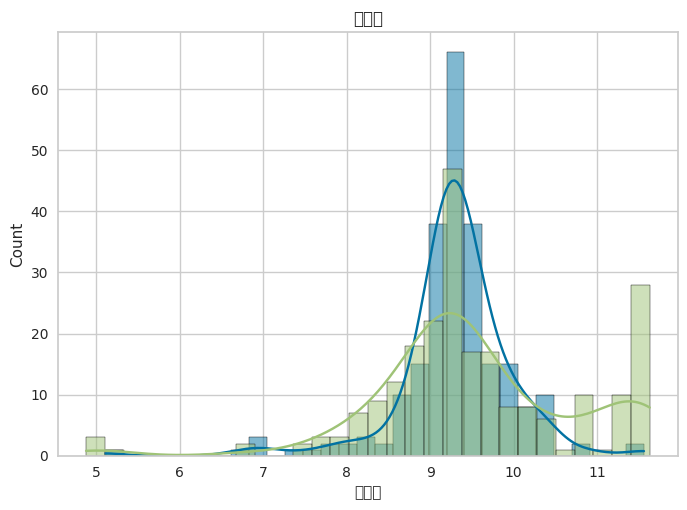

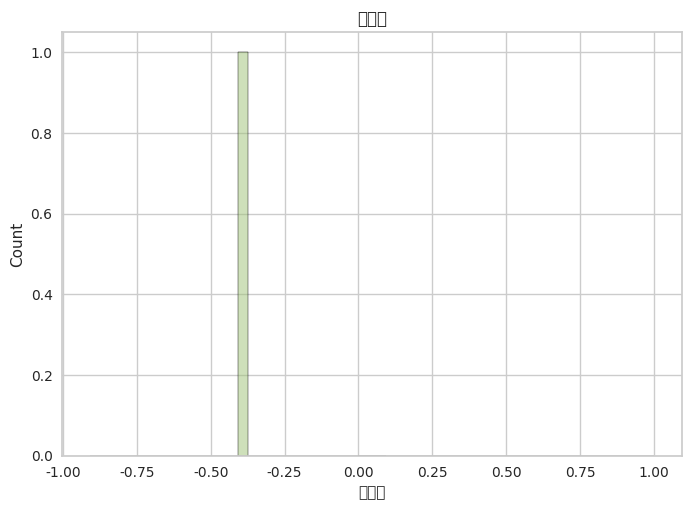

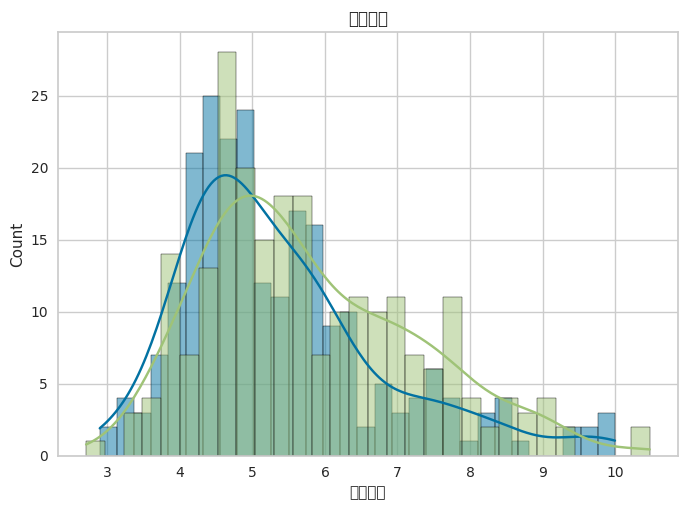

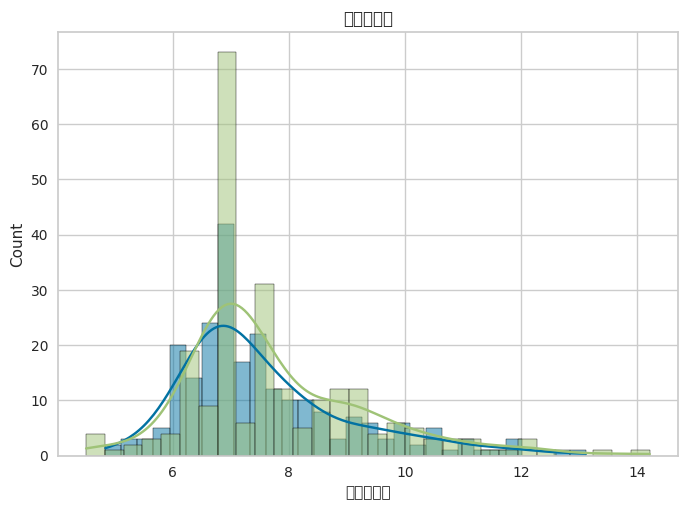

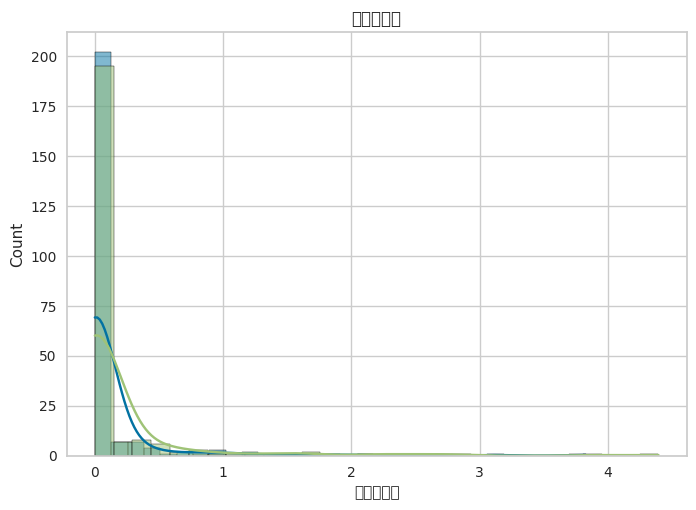

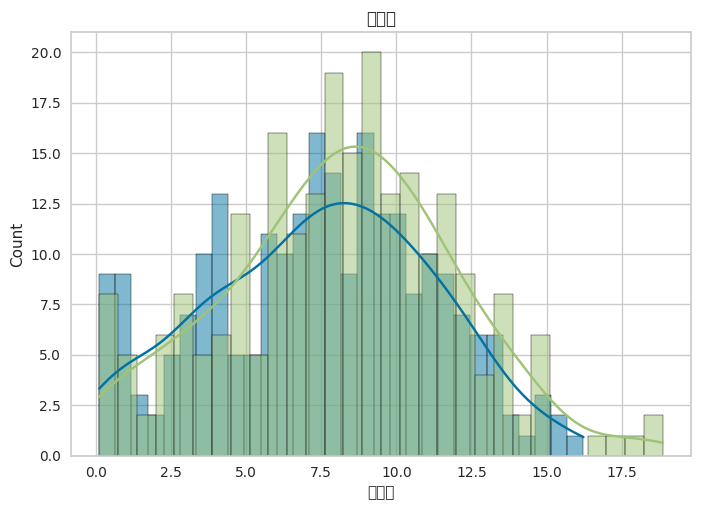

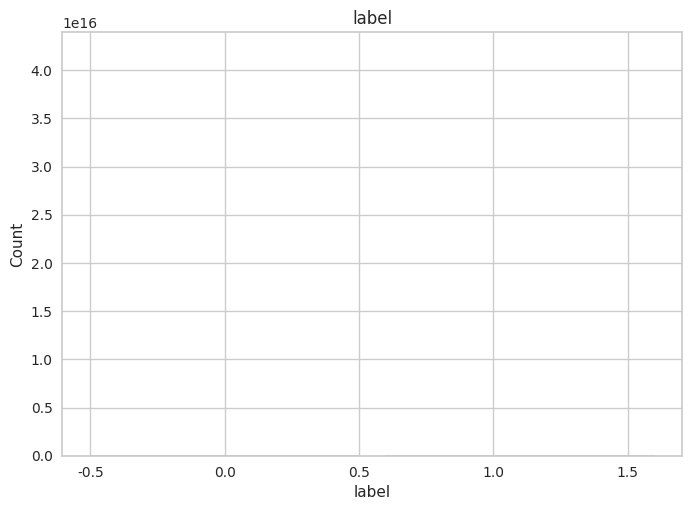

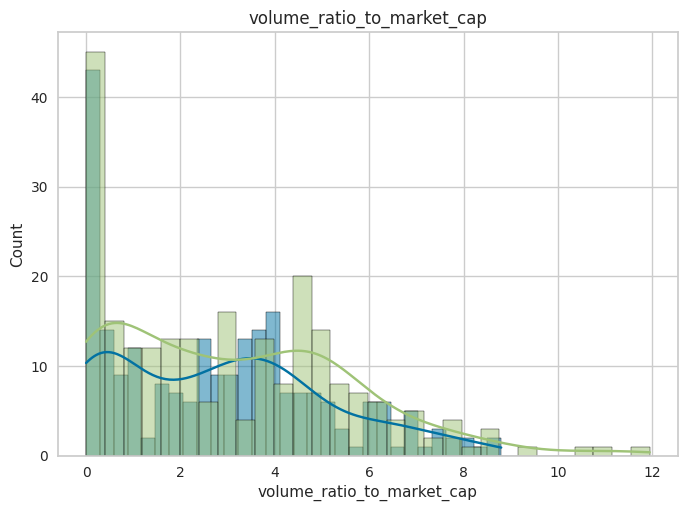

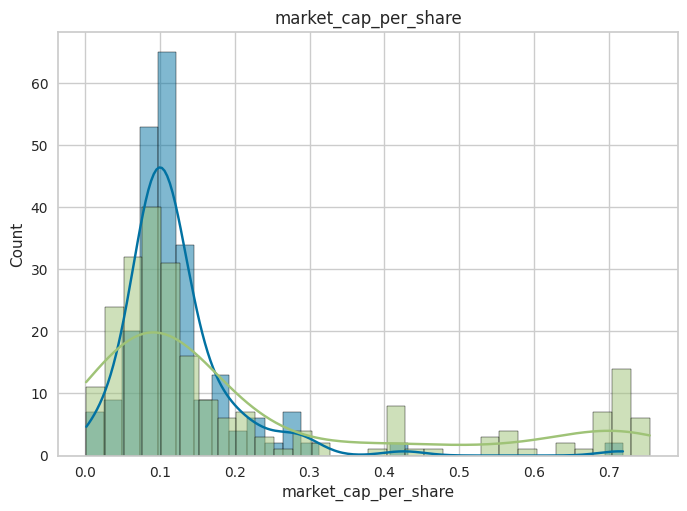

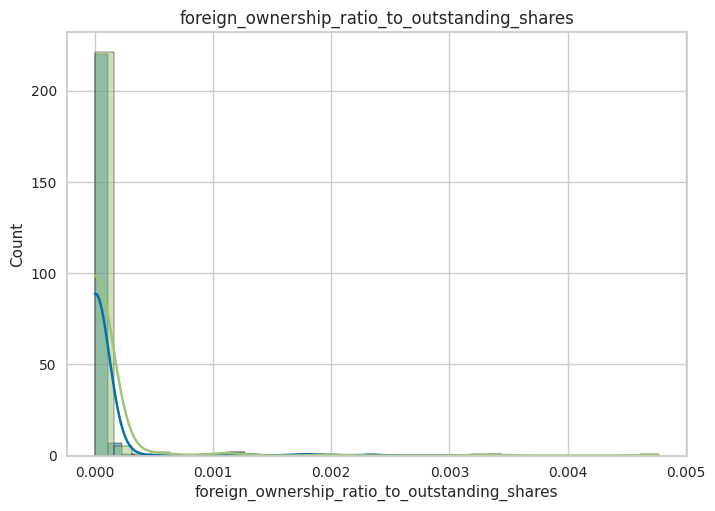

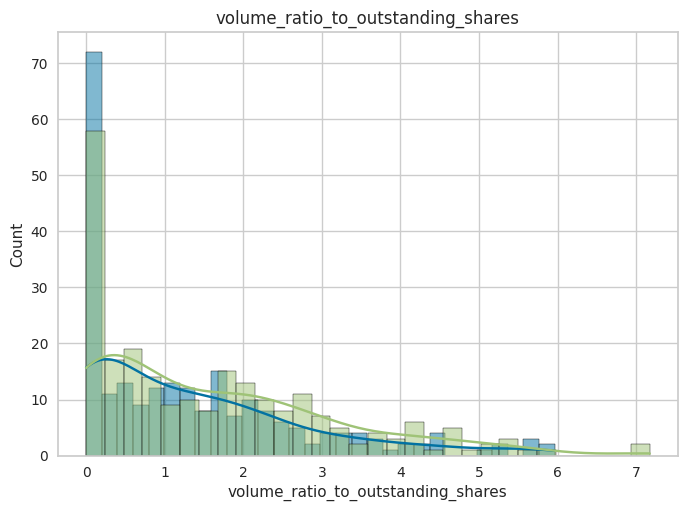

f_classif
Selected Features:
Index(['현재가', '전일비', '시가총액', '상장주식수', '외국인비율', '거래량',
       'volume_ratio_to_market_cap', 'market_cap_per_share',
       'foreign_ownership_ratio_to_outstanding_shares',
       'volume_ratio_to_outstanding_shares'],
      dtype='object')

Removed Features:
Index([], dtype='object')


In [ ]:
#시각화 - no_face
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

train_no_face_2 = train_no_face[train_no_face['label'] == 2]
train_no_face_0 = train_no_face[train_no_face['label'] == 0].sample(n=len(train_no_face_2), random_state=42)


for col in train_no_face.columns:
    train_no_face_0[col] = np.log1p(train_no_face_0[col])
    train_no_face_2[col] = np.log1p(train_no_face_2[col])

    #means = train_no_face_0[col].mean()
    #stds = train_no_face_0[col].std()
    #train_no_face_0[col] = (train_no_face_0[col] - means) / stds

    #means = train_no_face_2[col].mean()
    #stds = train_no_face_2[col].std()
    #train_no_face_2[col] = (train_no_face_2[col] - means) / stds

    sns.histplot(data = train_no_face_0[col],bins=30,kde=True)
    sns.histplot(data = train_no_face_2[col],bins=30,kde=True)
    plt.title(col)
    plt.show()

from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

# 피처와 레이블 분리
y = train_no_face['label']
X = train_no_face.drop('label', axis=1)

# SelectKBest를 사용하여 피처 중요도 계산
selector = SelectKBest(score_func=f_classif, k = 10)  # k는 남길 피처의 개수
selector.fit(X, y)

# 중요도를 기준으로 피처 선택
selected_features = X.columns[selector.get_support()]
removed_features = X.columns[~selector.get_support()]

# 결과 출력
print('f_classif')
print("Selected Features:")
print(selected_features)

print("\nRemoved Features:")
print(removed_features)


In [ ]:
for col in removed_features:
    X = X.drop(col,axis = 1)

In [ ]:
# no_face
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

# 각 모델의 파라미터를 딕셔너리 형태로 저장한 리스트
how_many_model = 5
models = []
for mod in best_model[:how_many_model]:
    print(model)
    exec('model = mod')
    models.append((str(model).split('(')[0], model))
# 각 모델의 이름과 모델 객체를 저장하는 리스트

train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 156)
# 앙상블 모델 생성
ensemble_no_face = VotingClassifier(models)

# 앙상블 모델 학습 및 예측
ensemble_no_face.fit(train_x, train_y)
y_pred = ensemble_no_face.predict(test_x)
cnt = 0
for i in range(len(y_pred)):
    if y_pred[i] == test_y.iloc[i]:
        cnt += 1
print(cnt / len(y_pred))


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=6197, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=6197, solver='auto',
           

In [ ]:
test_data = pd.read_csv('./test.csv')
print(test_data)

        id        현재가       전일비     액면가       시가총액     상장주식수  외국인비율  \
0        0  65198.863   304.482     0.0   1212.443    1860.0  0.081   
1        1   6406.595   171.084   500.0   3711.403   57931.0  1.209   
2        2   4555.651   217.911   500.0   1596.002   35038.0  5.360   
3        3  25048.754   490.409  5000.0  26874.700  107291.0  4.048   
4        4   6526.482    22.684   500.0   1165.662   17858.0  0.959   
...    ...        ...       ...     ...        ...       ...    ...   
1202  1202   4325.526     6.672   500.0    941.994   21785.0  7.238   
1203  1203  11304.190   184.742     0.0    451.892    4000.0  0.183   
1204  1204  43386.960  3096.476  1000.0   4510.399   10395.0  6.199   
1205  1205  10296.578   991.098     0.0    103.003    1000.0  0.000   
1206  1206   7325.851    82.127   500.0    561.836    7670.0  0.256   

             거래량      PER     ROE  
0       4793.170      NaN     NaN  
1     282689.080   17.645   22.02  
2     214691.924 -216.934     NaN  
3  

In [ ]:
ans = {}
ones = []
for row in range(len(test_data)):
    if test_data['전일비'].iloc[row] == 0.00:
        ans[row] = 1
        ones.append(row)
test_data = test_data.drop(ones)

# 결측치를 중앙값으로 대체할 열들 선택
columns_to_impute = ['PER', 'ROE']

# 선택한 열들의 결측치를 중앙값으로 대체
test_data[columns_to_impute] = test_data[columns_to_impute].fillna(test_data[columns_to_impute].median())

# 결과 출력

print(test_data)
print(ans)

        id        현재가       전일비     액면가       시가총액     상장주식수  외국인비율  \
0        0  65198.863   304.482     0.0   1212.443    1860.0  0.081   
1        1   6406.595   171.084   500.0   3711.403   57931.0  1.209   
2        2   4555.651   217.911   500.0   1596.002   35038.0  5.360   
3        3  25048.754   490.409  5000.0  26874.700  107291.0  4.048   
4        4   6526.482    22.684   500.0   1165.662   17858.0  0.959   
...    ...        ...       ...     ...        ...       ...    ...   
1202  1202   4325.526     6.672   500.0    941.994   21785.0  7.238   
1203  1203  11304.190   184.742     0.0    451.892    4000.0  0.183   
1204  1204  43386.960  3096.476  1000.0   4510.399   10395.0  6.199   
1205  1205  10296.578   991.098     0.0    103.003    1000.0  0.000   
1206  1206   7325.851    82.127   500.0    561.836    7670.0  0.256   

             거래량      PER     ROE  
0       4793.170    8.209    4.50  
1     282689.080   17.645   22.02  
2     214691.924 -216.934    4.50  
3  

In [ ]:
#분리 - 결측치 제거
#액면가가 0인 데이터와 그렇지 않은 데이터를 분리.
test_no_face = test_data[test_data['액면가'] == 0]
test_face = test_data[test_data['액면가'] != 0]
'''
means = train_no_face.iloc[:,:-1].mean()
stds = train_no_face.iloc[:,:-1].std()
train_no_face.iloc[:,:-1] = (train_no_face.iloc[:,:-1] - means) / stds

means = train_face.iloc[:,:-1].mean()
stds = train_face.iloc[:,:-1].std()
train_face.iloc[:,:-1] = (train_face.iloc[:,:-1] - means) / stds
'''
test_no_face = test_no_face[['현재가','전일비','시가총액','상장주식수','외국인비율','거래량']]
print(test_no_face)
test_face = test_face[['현재가','전일비','액면가','시가총액','상장주식수','외국인비율','거래량','PER','ROE']]
print(test_face)

            현재가      전일비      시가총액      상장주식수  외국인비율          거래량
0     65198.863  304.482  1212.443   1860.000  0.081     4793.170
6     51916.272    2.944  5316.254  10240.000  0.020  2410179.432
8      6398.540   60.769   229.743   3588.855  0.878    86482.878
11    12609.840  513.178   634.009   5027.786  1.439  1770535.427
14    28750.064  145.663    86.111    300.000  0.000      240.136
...         ...      ...       ...        ...    ...          ...
1193  12595.170   70.951   148.732   1180.000  0.000      136.305
1195   4575.306  173.084    46.111   1000.000  0.000    53963.671
1199   7954.128   21.429    20.000    250.000  0.000      232.539
1203  11304.190  184.742   451.892   4000.000  0.183    35180.147
1205  10296.578  991.098   103.003   1000.000  0.000   295413.226

[339 rows x 6 columns]
            현재가       전일비     액면가       시가총액     상장주식수   외국인비율         거래량  \
1      6406.595   171.084   500.0   3711.403   57931.0   1.209  282689.080   
2      4555.651   217.911   

In [ ]:
#피치 엔지니어링
# 시가총액 대비 주식의 거래량 비율 (Volume Ratio to Market Cap)
test_no_face['volume_ratio_to_market_cap'] = test_no_face['거래량'] / test_no_face['시가총액']
test_face['volume_ratio_to_market_cap'] = test_face['거래량'] / test_face['시가총액']

# 주당 시가총액 (Market Cap per Share)
test_no_face['market_cap_per_share'] = test_no_face['시가총액'] / test_no_face['상장주식수']
test_face['market_cap_per_share'] = test_face['시가총액'] / test_face['상장주식수']

# PER 대비 ROE 비율 (ROE Ratio to PER)
test_face['roe_ratio_to_per'] = test_face['ROE'] / test_face['PER']

# 외국인비율 대비 거래량 비율 (Volume Ratio to Foreign Ownership Ratio)
test_no_face['volume_ratio_to_foreign_ownership_ratio'] = test_no_face['거래량'] / test_no_face['외국인비율']
test_face['volume_ratio_to_foreign_ownership_ratio'] = test_face['거래량'] / test_face['외국인비율']
#test_no_face['volume_ratio_to_foreign_ownership_ratio'] = (test_no_face['volume_ratio_to_foreign_ownership_ratio'] - test_no_face['volume_ratio_to_foreign_ownership_ratio'].mean()) / test_no_face['volume_ratio_to_foreign_ownership_ratio'].std()
#test_face['volume_ratio_to_foreign_ownership_ratio'] = (test_face['volume_ratio_to_foreign_ownership_ratio'] - test_face['volume_ratio_to_foreign_ownership_ratio'].mean()) / test_face['volume_ratio_to_foreign_ownership_ratio'].std()

# 주식의 상장주식수 대비 외국인 보유 주식 비율 (Foreign Ownership Ratio to Outstanding Shares)
test_no_face['foreign_ownership_ratio_to_outstanding_shares'] = test_no_face['외국인비율'] / test_no_face['상장주식수']
test_face['foreign_ownership_ratio_to_outstanding_shares'] = test_face['외국인비율'] / test_face['상장주식수']

# 상장주식수 대비 주식의 거래량 비율 (Volume Ratio to Outstanding Shares)
test_no_face['volume_ratio_to_outstanding_shares'] = test_no_face['거래량'] / test_no_face['상장주식수']
test_face['volume_ratio_to_outstanding_shares'] = test_face['거래량'] / test_face['상장주식수']

# 주식의 상장주식수 대비 PER 비율 (PER Ratio to Outstanding Shares)
test_face['per_ratio_to_outstanding_shares'] = test_face['PER'] / test_face['상장주식수']

# 액면가 대비 현재가 비율 (Price Ratio to Par Value)
test_face['price_ratio_to_par_value'] = test_face['현재가'] / test_face['액면가']

# 외국인비율 대비 시가총액 비율 (Market Cap Ratio to Foreign Ownership Ratio)
test_no_face['market_cap_ratio_to_foreign_ownership_ratio'] = test_no_face['시가총액'] / test_no_face['외국인비율']
test_face['market_cap_ratio_to_foreign_ownership_ratio'] = test_face['시가총액'] / test_face['외국인비율']

# 주식의 거래량 대비 PER 비율 (PER Ratio to Volume)
test_face['per_ratio_to_volume'] = test_face['PER'] / test_face['거래량']

del(test_face['전일비'])
#del(test_no_face['전일비'])
test_no_face['전일비'] = -1 * test_no_face['전일비']
# 데이터프레임에서 열별로 무한대 값 또는 너무 큰 값을 포함하는 열 검출
problematic_columns = []
for col in test_no_face.columns:
    if np.any(np.isinf(test_no_face[col])) or np.any(np.abs(test_no_face[col]) > np.finfo('float64').max):
        problematic_columns.append(col)

# 결과 출력
print("Problematic Columns:")
print(problematic_columns)

for col in problematic_columns:
    del(test_no_face[col])

problematic_columns = []
for col in test_face.columns:
    if np.any(np.isinf(test_face[col])) or np.any(np.abs(test_face[col]) > np.finfo('float64').max):
        problematic_columns.append(col)

# 결과 출력
print("Problematic Columns:")
print(problematic_columns)

for col in problematic_columns:
    del(test_face[col])

Problematic Columns:
['volume_ratio_to_foreign_ownership_ratio', 'market_cap_ratio_to_foreign_ownership_ratio']
Problematic Columns:
['volume_ratio_to_foreign_ownership_ratio', 'market_cap_ratio_to_foreign_ownership_ratio']


In [ ]:
#0.66:'현재가', '액면가', '상장주식수', '외국인비율', '거래량', 'PER'
#0.6349'시가총액', '상장주식수', '외국인비율', 'volume_ratio_to_market_cap','volume_ratio_to_outstanding_shares', 'per_ratio_to_volume'
#0.635'현재가', '상장주식수', '외국인비율', '거래량', 'PER', 'volume_ratio_to_market_cap'
for col in ['현재가', '액면가', '상장주식수', '외국인비율', '거래량', 'PER']: #0.635
    test_face = test_face.drop(col,axis=1)

In [ ]:
#face
y_pred_face = ensemble_face.predict(test_face)
print(y_pred_face)
for row in range(len(y_pred_face)):
    ans[test_face.index[row]] = y_pred_face[row]
print(ans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#no_face
y_pred_no_face = ensemble_no_face.predict(test_no_face)
print(y_pred_no_face)
for row in range(len(y_pred_no_face)):
    ans[test_no_face.index[row]] = y_pred_no_face[row]
print(ans)

[2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0
 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 2
 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
{49: 1, 51: 1, 61: 1, 99: 1, 115: 1, 131: 1, 143: 1, 144: 1, 184: 1, 196: 1, 202: 1, 220: 1, 245: 1, 269: 1, 270: 1, 300: 1, 309: 1, 362: 1, 369: 1, 375: 1, 384: 1, 457: 1, 471: 1, 476: 1, 499: 1, 569: 1, 587: 1, 594: 1, 659: 1, 739: 1, 803: 1, 838: 1, 868: 1, 872: 1, 884: 1, 954: 1, 968: 1, 1052: 1, 1073: 1, 

In [ ]:
submission = pd.read_csv('./sample_submission.csv')
print(submission)

        id  label
0        0      0
1        1      0
2        2      0
3        3      0
4        4      0
...    ...    ...
1202  1202      1
1203  1203      0
1204  1204      2
1205  1205      2
1206  1206      0

[1207 rows x 2 columns]


In [ ]:
for row in range(len(submission)):
    submission.iloc[row,1] = ans[row]
print(submission[550:580])

      id  label
550  550      0
551  551      0
552  552      0
553  553      0
554  554      0
555  555      0
556  556      0
557  557      0
558  558      0
559  559      0
560  560      0
561  561      0
562  562      0
563  563      0
564  564      0
565  565      0
566  566      0
567  567      0
568  568      0
569  569      1
570  570      0
571  571      0
572  572      0
573  573      0
574  574      0
575  575      0
576  576      0
577  577      0
578  578      0
579  579      0


In [ ]:
submission.to_csv('submission.csv',index = False)